In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

In [2]:
datasets_dir="D:/Data science/tun_kun/tun_kun/training"
label=["day","night"]

data=[]
MyList=os.listdir(datasets_dir)
print("Total Classes  Deetected:",len(MyList))
print("Importing Class..")
for i in range(len(MyList)):
    PicList=os.listdir(datasets_dir+'/'+label[i])
    for j in PicList:
        Img=cv2.imread(datasets_dir+'/'+label[i]+"/"+j)
        Img=cv2.cvtColor(Img,cv2.COLOR_BGR2HSV)
        data.append((Img,label[i]))
    print(i,end=" ")
print()


Total Classes  Deetected: 2
Importing Class..
0 1 


In [3]:
def split(data,Ratio):
    splits=random.sample(data,k=int(len(data)*Ratio))
    x=[]
    y=[]
    for i in range(len(splits)):
        x.append(splits[i][0])
        y.append(splits[i][1])
    x=np.array(x,dtype=object)
    y=np.array(y)
    return x,y

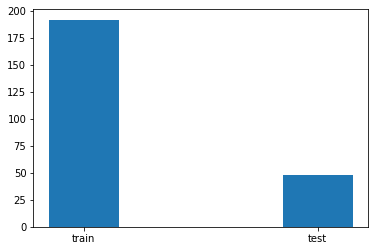

In [4]:
(x_train,y_train)=split(data,Ratio=0.8)
(x_test,y_test)=split(data,Ratio=0.2)


y=[len(x_train),len(x_test)]
x=["train","test"]
plt.bar(x,y,width = 0.3)
plt.show()

In [9]:
dataFrame={
    "X_size":[i.shape[1] for i in x_train],
    "Y_size":[i.shape[0] for i in x_train],
    "Value":[np.sum(i[::2]) for i in x_train],
    "Type":[i for i in y_train]
}

df=pd.DataFrame(dataFrame)
df

,X_size,Y_size,Value,Type
0,640,372,33627259,night
1,640,469,49119539,night
2,800,555,32415609,night
3,1280,889,146620268,day
4,1280,700,122619247,day
...,...,...,...,...
187,640,372,25686812,day
188,640,469,31699377,day
189,1280,889,141480805,day
190,800,458,65373755,day


In [10]:
print(df["X_size"].mean())
print(df["Y_size"].mean())

863.9479166666666
566.3645833333334


In [11]:
df1=df[df["Type"]=="day"]
df2=df[df["Type"]=="night"]

In [12]:
df1

,X_size,Y_size,Value,Type
3,1280,889,146620268,day
4,1280,700,122619247,day
6,640,372,24521885,day
11,800,531,42372671,day
14,640,439,32907361,day
...,...,...,...,...
187,640,372,25686812,day
188,640,469,31699377,day
189,1280,889,141480805,day
190,800,458,65373755,day


In [13]:
df2

,X_size,Y_size,Value,Type
0,640,372,33627259,night
1,640,469,49119539,night
2,800,555,32415609,night
5,800,591,47141326,night
7,800,531,40885344,night
...,...,...,...,...
178,857,614,10423651,night
179,1024,737,96042900,night
182,640,372,28674175,night
184,800,591,37323509,night


In [14]:
print(df1["Value"].min(),"day min")
print(df1["Value"].max(),"day max")
print(df1["Value"].mean(),"day mean")
print(df2["Value"].min(),"night min")
print(df2["Value"].max(),"night max")
print(df2["Value"].mean(),"night mean")

24521885 day min
160141248 day max
70245825.7628866 day mean
8212792 night min
131825894 night max
52428302.305263154 night mean


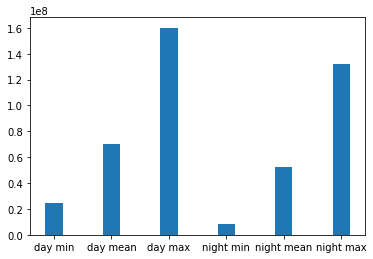

In [15]:
y=[df1["Value"].min(),df1["Value"].mean(),df1["Value"].max(),df2["Value"].min(),df2["Value"].mean(),df2["Value"].max()]
x=["day min","day mean","day max","night min","night mean","night max"]
plt.bar(x,y,width = 0.3)
plt.show()

In [16]:
#66818274-52119290=14698984
#14698984/2=7349492
#52119290+7349492=59468782
#850*560=476000
#59468782/476000=124